In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
df = pd.read_csv(url, header=None)

In [3]:
np.random.seed(42)
num_samples = 10000
data = {
    "Flight_Number": np.random.randint(1000, 9999, num_samples),
    "Airline": np.random.choice(["AA", "DL", "UA", "SW", "BA", "LH"], num_samples),
    "Departure_Airport": np.random.choice(["JFK", "LAX", "ORD", "DFW", "ATL"], num_samples),
    "Arrival_Airport": np.random.choice(["JFK", "LAX", "ORD", "DFW", "ATL"], num_samples),
    "Scheduled_Departure": np.random.randint(0, 24, num_samples),  # Hour of the day
    "Weather_Condition": np.random.choice(["Clear", "Rain", "Fog", "Storm"], num_samples),
    "Delay": np.random.choice([0, 1], num_samples, p=[0.7, 0.3])  # 70% flights on time, 30% delayed
}

df = pd.DataFrame(data)

In [4]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=["Airline", "Departure_Airport", "Arrival_Airport", "Weather_Condition"], drop_first=True)



In [5]:
# Splitting data
X = df.drop(columns=["Delay"])
y = df["Delay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [6]:
# Training Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [7]:
# Predictions
y_pred = rf_model.predict(X_test)



In [8]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.648
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.78      1395
           1       0.28      0.10      0.15       605

    accuracy                           0.65      2000
   macro avg       0.49      0.49      0.46      2000
weighted avg       0.57      0.65      0.59      2000



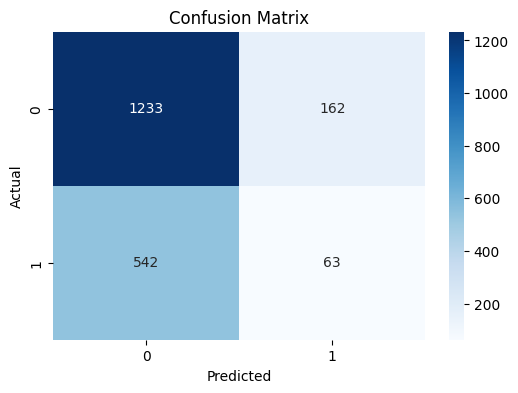

In [11]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-12-d6492e2b9c55>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Delay"], palette="coolwarm")


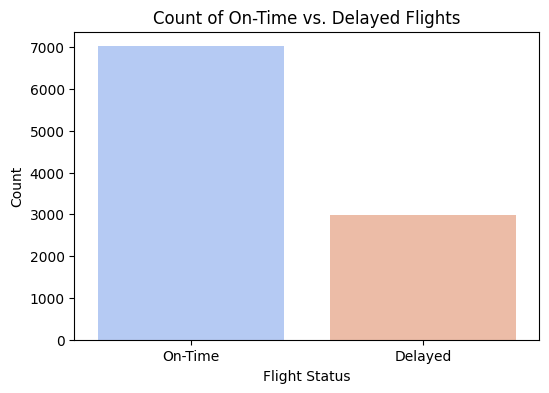

In [12]:
# Count Plot of Delayed vs. On-Time Flights
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Delay"], palette="coolwarm")
plt.xticks([0, 1], ["On-Time", "Delayed"])
plt.xlabel("Flight Status")
plt.ylabel("Count")
plt.title("Count of On-Time vs. Delayed Flights")
plt.show()


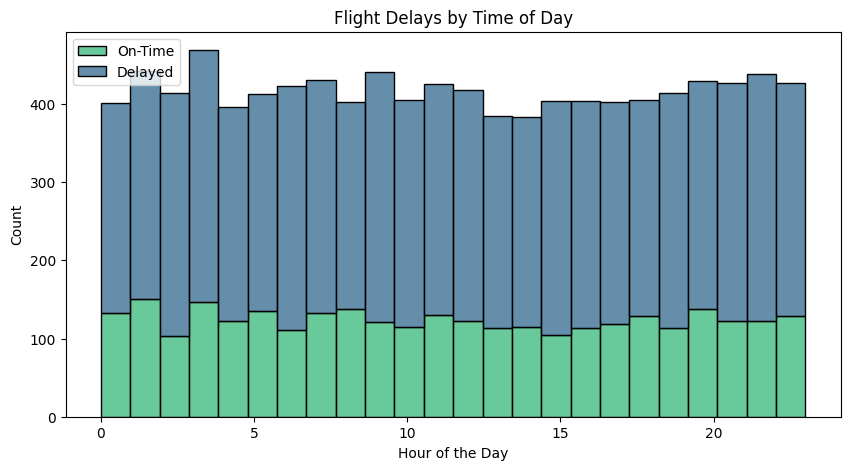

In [16]:
# Delays by Departure Time (Hour of the Day)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Scheduled_Departure", hue="Delay", multiple="stack", bins=24, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Flight Delays by Time of Day")
plt.legend(["On-Time", "Delayed"])
plt.show()
